Sentence Classification Examples:

    1. Sentiment Analysis
        1.1 Positive
        1.2 Negative
        I really hate this music -> Negative -> 0
        I love this food -> Positive -> 1
    2. Jumla qaysi tilda yozilganini aniqlash
    3. Names dataset classification

In [ ]:
%%capture
!pip install unidecode

In [ ]:
import torch
from google.colab import drive

drive.mount("/drive")

Mounted at /drive


In [ ]:
from unidecode import unidecode

In [ ]:
!ls /drive/MyDrive/data/names

Arabic.txt   English.txt  Irish.txt	Polish.txt	Spanish.txt
Chinese.txt  French.txt   Italian.txt	Portuguese.txt	Vietnamese.txt
Czech.txt    German.txt   Japanese.txt	Russian.txt
Dutch.txt    Greek.txt	  Korean.txt	Scottish.txt


In [ ]:
!cat /drive/MyDrive/data/names/Arabic.txt

Khoury
Nahas
Daher
Gerges
Nazari
Maalouf
Gerges
Naifeh
Guirguis
Baba
Sabbagh
Attia
Tahan
Haddad
Aswad
Najjar
Dagher
Maloof
Isa
Asghar
Nader
Gaber
Abboud
Maalouf
Zogby
Srour
Bahar
Mustafa
Hanania
Daher
Tuma
Nahas
Saliba
Shamoon
Handal
Baba
Amari
Bahar
Atiyeh
Said
Khouri
Tahan
Baba
Mustafa
Guirguis
Sleiman
Seif
Dagher
Bahar
Gaber
Harb
Seif
Asker
Nader
Antar
Awad
Srour
Shadid
Hajjar
Hanania
Kalb
Shadid
Bazzi
Mustafa
Masih
Ghanem
Haddad
Isa
Antoun
Sarraf
Sleiman
Dagher
Najjar
Malouf
Nahas
Naser
Saliba
Shamon
Malouf
Kalb
Daher
Maalouf
Wasem
Kanaan
Naifeh
Boutros
Moghadam
Masih
Sleiman
Aswad
Cham
Assaf
Quraishi
Shalhoub
Sabbag
Mifsud
Gaber
Shammas
Tannous
Sleiman
Bazzi
Quraishi
Rahal
Cham
Ghanem
Ghanem
Naser
Baba
Shamon
Almasi
Basara
Quraishi
Bata
Wasem
Shamoun
Deeb
Touma
Asfour
Deeb
Hadad
Naifeh
Touma
Bazzi
Shamoun
Nahas
Haddad
Arian
Kouri
Deeb
Toma
Halabi
Nazari
Saliba
Fakhoury
Hadad
Baba
Mansour
Sayegh
Antar
Deeb
Morcos
Shalhoub
Sarraf
Amari
Wasem
Ganim
Tuma
Fakhoury
Hadad
Hakimi
Nader
Sa

In [ ]:
import os
from glob import glob

In [ ]:
root_dir = "/drive/MyDrive/data/names"
file_names = glob("*.txt", root_dir=root_dir)
unique_labels = sorted([os.path.splitext(file_name)[0] for file_name in file_names])
n_labels = len(unique_labels)
idx2label = {idx:label for idx, label in enumerate(unique_labels)}
label2idx = {label:idx for idx, label in idx2label.items()}

In [ ]:
def replace(name, chars, target):
    for char in chars:
        name = name.replace(char, target)
    return name

In [ ]:
X_names = []
Y_labels = []

for file_name in file_names:
    with open(os.path.join(root_dir, file_name), "rt", encoding='utf-8') as f:
        for line in f:
            name = line.strip().lower()
            name = unidecode(name)

            if name == 'to the first page':
                continue

            name = replace(name, [",", '1', "/b", ":", "\xa0"], '')
            name = replace(name, ['-'], ' ')

            X_names.append(name)
            Y_labels.append(os.path.splitext(file_name)[0])

1. Remove "To The First Page" names from dataset
2. Replace ",", '1', "/B", ":", \xa0 with empty string
3. Replace '-' with ' '
4. Convert all the following from unicode to ascii:
[ 'ß',
 'à',
 'á',
 'ã',
 'ä',
 'ç',
 'è',
 'é',
 'ê',
 'ì',
 'í',
 'ñ',
 'ò',
 'ó',
 'õ',
 'ö',
 'ù',
 'ú',
 'ü',
 'ą',
 'ł',
 'ń',
 'ś',
 'ż']

In [ ]:
pad_token = '.'
pad_token_id = 0

unique_chars = [pad_token] + sorted(set(''.join(X_names)))
idx2char = {idx:char for idx, char in enumerate(unique_chars)}
char2idx = {char:idx for idx, char in idx2char.items()}

def encode(name: str) -> list[int]:
    return [char2idx[char] for char in name]

def decode(ids: list[int]) -> str:
    return ''.join(idx2char[i] for i in ids)

In [ ]:
Y = [label2idx[label] for label in Y_labels]
X = [encode(name) for name in X_names]

In [ ]:
X[:5]

[[3, 3, 14, 21, 4, 23, 20, 9],
 [3, 3, 14, 21, 22],
 [3, 3, 20, 14, 7],
 [3, 5, 10, 22, 7, 20, 7, 16],
 [3, 5, 10, 22, 10, 17, 24, 7, 16]]

1. Split data into train and test
2. NamesDataset for both train and test
3. Data Loader for both train and test with custom `collate` function

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f"Total samples: {len(X)}")
print(f"Training samples (X_train): {len(X_train)}")
print(f"Testing samples (X_test): {len(X_test)}")


Total samples: 20051
Training samples (X_train): 16040
Testing samples (X_test): 4011


(array([ 400.,   54.,  104.,   59.,  734.,   55.,  145.,   41.,   46.,
         142.,  198.,   19.,   28.,   15., 1877.,   20.,   60.,   14.]),
 array([ 0.        ,  0.94444444,  1.88888889,  2.83333333,  3.77777778,
         4.72222222,  5.66666667,  6.61111111,  7.55555556,  8.5       ,
         9.44444444, 10.38888889, 11.33333333, 12.27777778, 13.22222222,
        14.16666667, 15.11111111, 16.05555556, 17.        ]),
 <BarContainer object of 18 artists>)

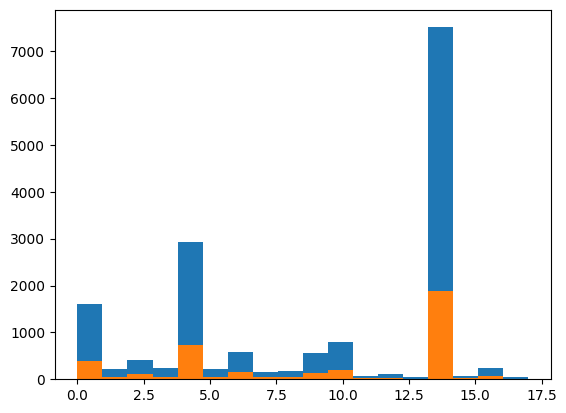

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Y_train, bins=n_labels)
plt.hist(Y_test, bins=n_labels)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class NamesDataset(Dataset):
    def __init__(self, features, labels):
        self.X = features
        self.Y = labels

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.Y[index]

train_dataset = NamesDataset(X_train, Y_train)
test_dataset = NamesDataset(X_test, Y_test)

print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")

Train Dataset Size: 16040
Test Dataset Size: 4011


In [ ]:
def sequence_collate_fn(batch):
    X_list, Y_list = zip(*batch)

    max_len = max(len(x) for x in X_list)

    padded_X_list = [
        x + [0] * (max_len - len(x))
        for x in X_list
    ]

    X_padded = torch.tensor(padded_X_list, dtype=torch.long)

    Y_tensor = torch.tensor(Y_list, dtype=torch.long)

    return X_padded, Y_tensor

In [ ]:
BATCH_SIZE = 4

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=sequence_collate_fn
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=sequence_collate_fn
)

print(f"Train batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

Train batches: 4010
Test batches: 1003


In [ ]:
idx2label

{0: 'Arabic',
 1: 'Chinese',
 2: 'Czech',
 3: 'Dutch',
 4: 'English',
 5: 'French',
 6: 'German',
 7: 'Greek',
 8: 'Irish',
 9: 'Italian',
 10: 'Japanese',
 11: 'Korean',
 12: 'Polish',
 13: 'Portuguese',
 14: 'Russian',
 15: 'Scottish',
 16: 'Spanish',
 17: 'Vietnamese'}

In [ ]:
# Define Model
import torch
import torch.nn as nn
import torch.nn.functional as F
from dataclasses import dataclass

class  NamesClassifier(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.emb = nn.Embedding(self.config.vocab_size, self.config.n_embd) # B, T, C
        self.conv = nn.Conv1d(self.config.n_embd, self.config.n_conv_channels, self.config.kernel_size)

        self.max_pool = nn.AdaptiveMaxPool1d(1)
        self.drop = nn.Dropout(self.config.drop_rate)
        self.fc = nn.Linear(self.config.n_conv_channels, self.config.n_labels)

    def forward(self, x):
        x = self.emb(x)
        x = x.permute(0, 2, 1)
        x = self.conv(x)
        x = self.max_pool(x)
        x = self.drop(x.squeeze())
        x = self.fc(x)
        return x

@dataclass
class Config:
    vocab_size: int
    n_embd: int
    n_conv_channels: int
    kernel_size: int
    drop_rate: float
    n_labels: int

config = Config(vocab_size=29, n_embd=16, n_conv_channels=32, kernel_size=3, drop_rate=0.5, n_labels=18)
model = NamesClassifier(config)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model

NamesClassifier(
  (emb): Embedding(29, 16)
  (conv): Conv1d(16, 32, kernel_size=(3,), stride=(1,))
  (max_pool): AdaptiveMaxPool1d(output_size=1)
  (drop): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=18, bias=True)
)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    epoch_loss = 0.0
    all_preds = []
    all_targets = []
    for x, y in test_loader:
        logits = model(x)
        loss = F.cross_entropy(logits, y)
        epoch_loss += loss.item()
        _, preds = torch.max(logits, 1)
        all_preds.extend(preds)
        all_targets.extend(y)
    epoch_loss = epoch_loss / len(train_loader)
    acc = accuracy_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds, average='weighted')
    precision = precision_score(all_targets, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_targets, all_preds, average='weighted', zero_division=0)
    return epoch_loss, acc, f1, precision, recall

def train(model, optimizer, n_epoch=3):
    lossi = []
    for epoch in range(n_epoch):
        model.train()
        epoch_loss = 0.0
        for x, y in train_loader:
            logits = model(x)
            loss = F.cross_entropy(logits, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            lossi.append(loss.item())
        epoch_loss = epoch_loss / len(train_loader)
        eval_loss, acc, f1, precision, recall = evaluate(model, test_loader)
        print(f"Epoch {epoch+1} | "
              f"Train Loss: {epoch_loss:.3f} | "
              f"Eval Loss: {eval_loss:.3f} | "
              f"Accuracy: {acc:.3f} | "
              f"F1-Score: {f1:.3f}")

In [ ]:
lossi = train(model, optimizer)

Epoch 1 | Train Loss: 1.012 | Eval Loss: 0.215 | Accuracy: 0.751 | F1-Score: 0.706
Epoch 2 | Train Loss: 1.007 | Eval Loss: 0.215 | Accuracy: 0.746 | F1-Score: 0.697
Epoch 3 | Train Loss: 0.995 | Eval Loss: 0.213 | Accuracy: 0.740 | F1-Score: 0.688


In [ ]:
torch.save({
    "model_state_dict":model.state_dict(),
    "model_config": config,
    "optimizer": optimizer.state_dict()}, 'cnn_for_sentence.pth')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(all_targets, all_preds)

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()